In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
space_df = pd.read_csv('space_titanic.csv')

In [4]:
space_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
space_df.columns = [column.lower() for column in space_df.columns]
space_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
space_df = space_df.dropna()

In [12]:
cols_to_drop = ['cabin', 'passengerid', 'name']

space_df.drop(columns = cols_to_drop, inplace=True)

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_46574/2485448731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_df.drop(columns = cols_to_drop, inplace=True)


In [13]:
space_df

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [16]:
dummies = pd.get_dummies(space_df[['homeplanet', 'destination']], drop_first = True)

In [19]:
space_df = pd.concat([space_df, dummies], axis = 1)

In [20]:
space_df.drop(columns = ['homeplanet', 'destination'], inplace = True)

space_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [22]:
space_df['transported']= np.where(space_df['transported']== True, 'True', 'False')


In [28]:
train, val, test = prepare.train_val_test(space_df)

In [26]:
train

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
1932,True,30.0,False,0.0,0.0,0.0,0.0,0.0,True,1,0,0,1
6368,True,37.0,True,0.0,0.0,0.0,0.0,0.0,True,1,0,0,0
6377,False,16.0,False,1337.0,0.0,2614.0,0.0,0.0,False,0,1,0,0
7683,False,39.0,False,19.0,3603.0,0.0,421.0,517.0,True,1,0,0,1
4732,True,17.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,True,31.0,False,0.0,0.0,0.0,0.0,0.0,True,1,0,0,0
6864,False,22.0,False,28.0,194.0,2.0,0.0,370.0,True,0,0,1,0
6919,False,25.0,False,0.0,115.0,0.0,1823.0,4041.0,False,1,0,0,1
7137,False,40.0,True,0.0,21.0,0.0,1503.0,1392.0,False,1,0,0,0


In [32]:
x_train = train.drop(columns = ['transported'])
y_train = train['transported']

x_val = val.drop(columns = ['transported'])
y_val = val['transported']

x_test = test.drop(columns = ['transported'])
y_test = test['transported']




In [50]:
seed = 99 

clf = DecisionTreeClassifier(max_depth = 3, random_state = 99)

In [51]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=99)

In [52]:
clf.score(x_train, y_train)

0.7177768166089965

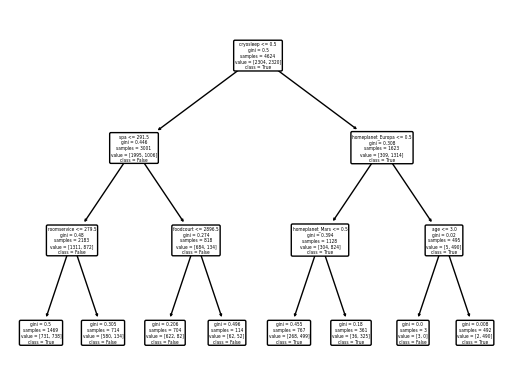

In [53]:
plot_tree(clf, feature_names = x_train.columns, class_names = clf.classes_, rounded = True)
plt.show()

In [54]:
val_preds = clf.predict(x_val)

In [56]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

       False       0.83      0.52      0.64       481
        True       0.67      0.90      0.77       510

    accuracy                           0.72       991
   macro avg       0.75      0.71      0.70       991
weighted avg       0.75      0.72      0.70       991



In [57]:
clf.score(x_train, y_train)

0.7177768166089965

In [58]:
big_clf = DecisionTreeClassifier(max_depth = 10, random_state = 99)

In [60]:
big_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=99)

In [61]:
big_clf.score(x_train, y_train)

0.8349913494809689

In [62]:
big_clf.score(x_val, y_val)

0.7840565085771948